# Computer Vision for the Food-101 dataset
## Dataset
Information about the Food-101 dataset: https://www.vision.ee.ethz.ch/datasets_extra/food-101/

Find the dataset on kaggle: https://www.kaggle.com/kmader/food41

In [5]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [6]:
from fastai.vision import *
from fastai.metrics import error_rate

# following lines are bc fastprogress bar is not working 
import fastai
from fastprogress import force_console_behavior
import fastprogress
fastprogress.fastprogress.NO_BAR = True
master_bar, progress_bar = force_console_behavior()
fastai.core.master_bar, fastai.core.progress_bar = master_bar, progress_bar

In [7]:
path = Path('./data/images')
path.ls()

[PosixPath('data/images/valid'),
 PosixPath('data/images/.ipynb_checkpoints'),
 PosixPath('data/images/models'),
 PosixPath('data/images/train')]

## View data

In [8]:
np.random.seed(2)
data = ImageDataBunch.from_folder(path, train='train', valid='valid',
                                  ds_tfms=get_transforms(),
                                  size=224, num_workers=4).normalize(imagenet_stats)

In [5]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['apple_pie',
  'baby_back_ribs',
  'baklava',
  'beef_carpaccio',
  'beef_tartare',
  'beet_salad',
  'beignets',
  'bibimbap',
  'bread_pudding',
  'breakfast_burrito',
  'bruschetta',
  'caesar_salad',
  'cannoli',
  'caprese_salad',
  'carrot_cake',
  'ceviche',
  'cheese_plate',
  'cheesecake',
  'chicken_curry',
  'chicken_quesadilla',
  'chicken_wings',
  'chocolate_cake',
  'chocolate_mousse',
  'churros',
  'clam_chowder',
  'club_sandwich',
  'crab_cakes',
  'creme_brulee',
  'croque_madame',
  'cup_cakes',
  'deviled_eggs',
  'donuts',
  'dumplings',
  'edamame',
  'eggs_benedict',
  'escargots',
  'falafel',
  'filet_mignon',
  'fish_and_chips',
  'foie_gras',
  'french_fries',
  'french_onion_soup',
  'french_toast',
  'fried_calamari',
  'fried_rice',
  'frozen_yogurt',
  'garlic_bread',
  'gnocchi',
  'greek_salad',
  'grilled_cheese_sandwich',
  'grilled_salmon',
  'guacamole',
  'gyoza',
  'hamburger',
  'hot_and_sour_soup',
  'hot_dog',
  'huevos_rancheros',
  'hummu

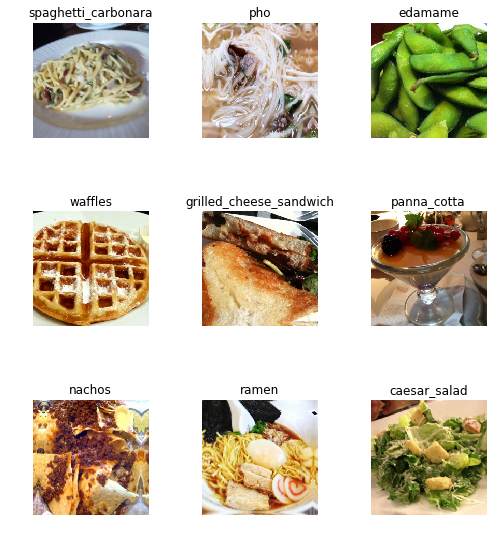

In [6]:
data.show_batch(rows=3, figsize=(7,8))

## Train model
Using a resnet50

In [9]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

In [8]:
fastai.basic_train.master_bar, fastai.basic_train.progress_bar = master_bar, progress_bar
learn.fit_one_cycle(6)

epoch     train_loss  valid_loss  error_rate
1         1.988786    1.375961    0.368238    
2         1.637350    1.087590    0.298257    
3         1.438326    0.942564    0.261584    
4         1.299801    0.845972    0.233901    
5         1.158882    0.789945    0.219485    
6         1.114082    0.778152    0.217307    
Total time: 2:59:55


In [9]:
learn.save('stage-1-50')

In [10]:
learn.export(fname='stage-1-50.pkl')

In [11]:
learn.export(fname='stage-1-50_backup.pkl')

In [12]:
learn.load('stage-1-50')
learn.unfreeze()
learn.lr_find()

epoch     train_loss  valid_loss  error_rate
1         4.389470                
LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 2.29E-06


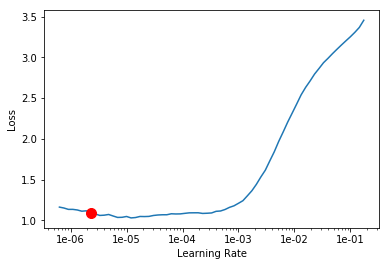

In [13]:
learn.recorder.plot()

## Interpretation of stage-1-50 results

In [14]:
learn.load('stage-1-50')
interp = ClassificationInterpretation.from_learner(learn)

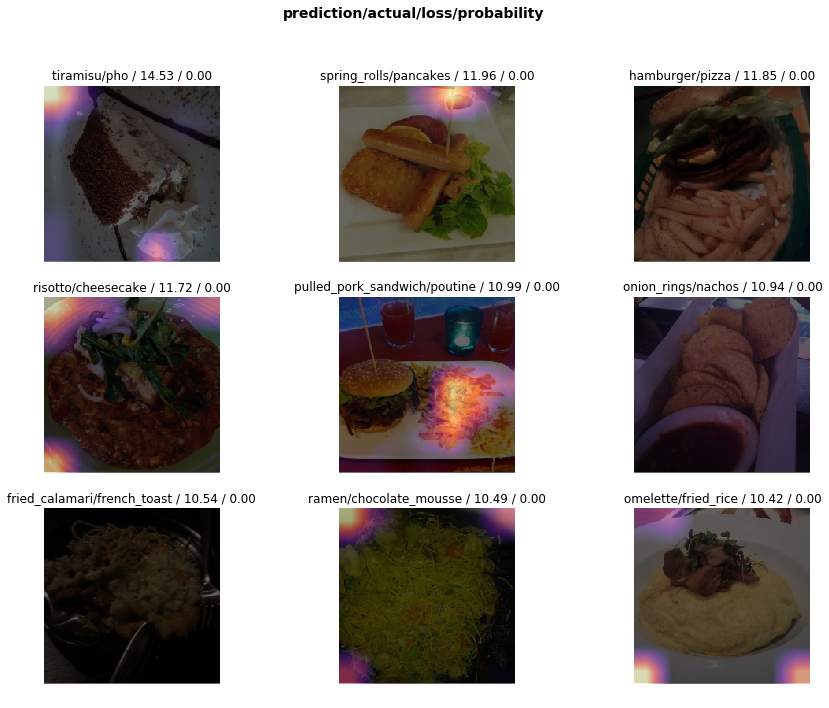

In [15]:
interp.plot_top_losses(9, figsize=(15,11))

In [18]:
interp.most_confused()[:20]

[('steak', 'filet_mignon', 45),
 ('tuna_tartare', 'beef_tartare', 29),
 ('filet_mignon', 'steak', 24),
 ('steak', 'prime_rib', 24),
 ('pork_chop', 'filet_mignon', 23),
 ('chocolate_cake', 'chocolate_mousse', 22),
 ('steak', 'pork_chop', 22),
 ('pork_chop', 'grilled_salmon', 21),
 ('beef_tartare', 'tuna_tartare', 20),
 ('chocolate_mousse', 'chocolate_cake', 20),
 ('chocolate_mousse', 'panna_cotta', 20),
 ('apple_pie', 'bread_pudding', 19),
 ('falafel', 'crab_cakes', 18),
 ('cheesecake', 'strawberry_shortcake', 17),
 ('pulled_pork_sandwich', 'hamburger', 17),
 ('ravioli', 'lasagna', 17),
 ('risotto', 'fried_rice', 16),
 ('club_sandwich', 'grilled_cheese_sandwich', 15),
 ('filet_mignon', 'prime_rib', 15),
 ('tiramisu', 'chocolate_mousse', 15)]

In [11]:
learn.load('stage-1-50');

In [13]:
learn.unfreeze()
fastai.basic_train.master_bar, fastai.basic_train.progress_bar = master_bar, progress_bar
learn.fit_one_cycle(4, max_lr=slice(2.29E-06,1e-5))

epoch     train_loss  valid_loss  error_rate
1         1.070375    0.759055    0.210772    
2         1.049167    0.728704    0.203248    
3         0.985732    0.711172    0.198020    
4         0.975406    0.708648    0.196554    
Total time: 2:05:46


In [14]:
learn.save('stage-2-50')

In [15]:
learn.export(fname='stage-2-50.pkl')

In [16]:
learn.export(fname='stage-2-50_backup.pkl')